In [1]:
import numpy as np
SEED = 7
np.random.seed(SEED)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install kagglehub


In [4]:
import kagglehub

In [5]:
# Download latest version of dataset
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Path to dataset files: /kaggle/input/network-intrusion-dataset


In [7]:
import os

path = "/kaggle/input/network-intrusion-dataset"
os.listdir(path)


['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [8]:
import pandas as pd

df1 = pd.read_csv(os.path.join(path, "Monday-WorkingHours.pcap_ISCX.csv"))
df2 = pd.read_csv(os.path.join(path,"Tuesday-WorkingHours.pcap_ISCX.csv" ))
df3 = pd.read_csv(os.path.join(path, 'Wednesday-workingHours.pcap_ISCX.csv'))
df4 = pd.read_csv(os.path.join(path, 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'))
df5 = pd.read_csv(os.path.join(path, 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv' ))
df6 = pd.read_csv(os.path.join(path, 'Friday-WorkingHours-Morning.pcap_ISCX.csv' ))
df7 = pd.read_csv(os.path.join(path, 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'))
df8 = pd.read_csv(os.path.join(path, 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'))

df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
data_list = [df1, df2, df3, df4, df5, df6, df7, df8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 225745 rows, 79 columns
Data8 -> 286467 rows, 79 columns


In [10]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [11]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [82]:
data.to_csv("original_cicids_dataset",index=False)

In [12]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [14]:
data.columns = data.columns.str.strip().str.lower()

In [15]:
value_counts = data['label'].value_counts()
percentages = data['label'].value_counts(normalize=True) * 100

pd.DataFrame({'Count': value_counts, 'Percentage': percentages.round(2)})


,Count,Percentage
label,,
BENIGN,2273097,80.30
DoS Hulk,231073,8.16
PortScan,158930,5.61
DDoS,128027,4.52
DoS GoldenEye,10293,0.36
FTP-Patator,7938,0.28
SSH-Patator,5897,0.21
DoS slowloris,5796,0.20
DoS Slowhttptest,5499,0.19


Data Cleaning

In [16]:
# Total duplicates in the data
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [17]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [18]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

flow bytes/s    353
dtype: int64


In [19]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

flow bytes/s      1211
flow packets/s    1564
dtype: int64


In [20]:

# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [21]:

missing = data.isna().sum()
print(missing.loc[missing > 0])

flow bytes/s      1564
flow packets/s    1564
dtype: int64


In [22]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

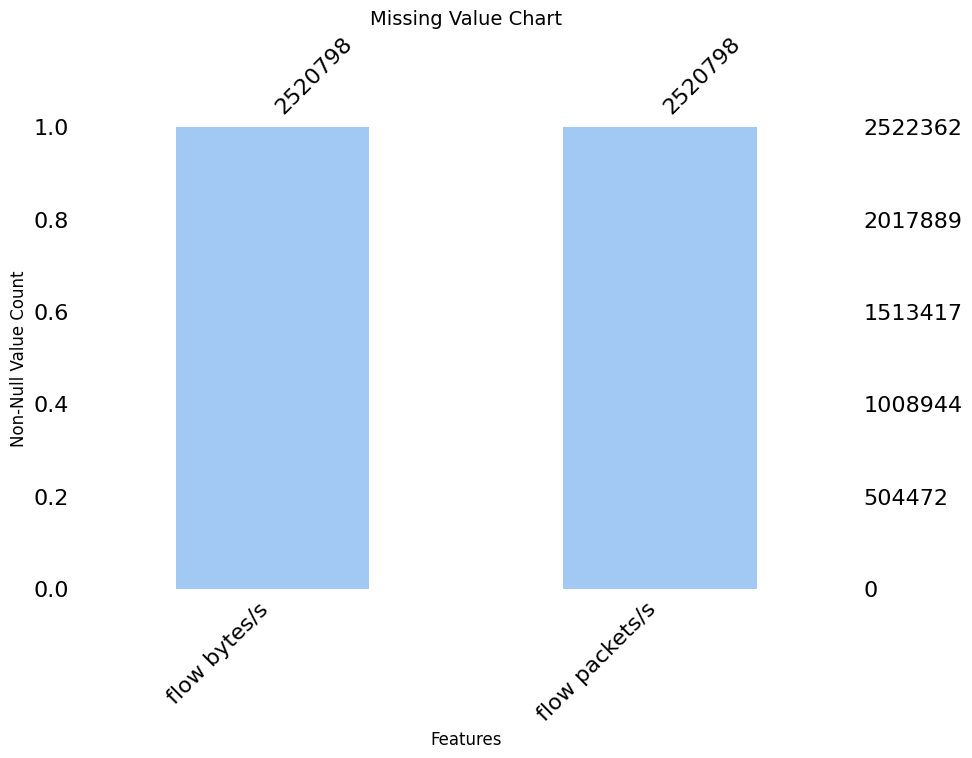

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set_palette('pastel')
colors = sns.color_palette()

# Identify columns with missing values
missing_vals = [col for col in data.columns if data[col].isna().any()]

# Plot missing values
fig, ax = plt.subplots(figsize=(10, 6))  # Increased width for better readability
msno.bar(data[missing_vals], ax=ax, color=colors[0])
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize=12)
ax.set_title('Missing Value Chart', fontsize=14)
plt.show()


In [24]:
med_flow_bytes = data['flow bytes/s'].median()
med_flow_packets = data['flow packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [25]:
# Filling missing values with median
data['flow bytes/s'].fillna(med_flow_bytes, inplace = True)
data['flow packets/s'].fillna(med_flow_packets, inplace = True)

In [26]:

print('Number of \'Flow Bytes/s\' missing values:', data['flow bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['flow packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


Analysing Patterns using Visualizations

In [27]:
data['label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'DDoS',
       'PortScan'], dtype=object)

In [28]:
data['label'].value_counts()

,count
label,
BENIGN,2096484
DoS Hulk,172849
DDoS,128016
PortScan,90819
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [29]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['attack type'] = data['label'].map(attack_map)

In [30]:
data['attack type'].value_counts()

,count
attack type,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953
Infiltration,36
Heartbleed,11


In [31]:
data.drop('label', axis = 1, inplace = True)

In [32]:
print(data.columns)

Index(['destination port', 'flow duration', 'total fwd packets',
       'total backward packets', 'total length of fwd packets',
       'total length of bwd packets', 'fwd packet length max',
       'fwd packet length min', 'fwd packet length mean',
       'fwd packet length std', 'bwd packet length max',
       'bwd packet length min', 'bwd packet length mean',
       'bwd packet length std', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min',
       'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max',
       'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std',
       'bwd iat max', 'bwd iat min', 'fwd psh flags', 'bwd psh flags',
       'fwd urg flags', 'bwd urg flags', 'fwd header length',
       'bwd header length', 'fwd packets/s', 'bwd packets/s',
       'min packet length', 'max packet length', 'packet length mean',
       'packet length std', 'packet length variance', 'fin flag count',
       'syn flag co

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['attack number'] = le.fit_transform(data['attack type'])

print(data['attack number'].unique())

[0 2 4 5 8 6 1 3 7]


In [34]:
# Printing corresponding attack type for each encoded value
encoded_values = data['attack number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [35]:
corr = data.corr(numeric_only = True).round(2)
corr

,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,fwd packet length std,...,min_seg_size_forward,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min,attack number
destination port,1.00,-0.17,-0.00,-0.00,0.01,-0.00,0.09,-0.05,0.14,0.12,...,0.0,-0.04,-0.05,-0.06,-0.03,-0.13,0.01,-0.12,-0.13,-0.13
flow duration,-0.17,1.00,0.02,0.02,0.06,0.02,0.26,-0.12,0.13,0.22,...,-0.0,0.18,0.24,0.29,0.12,0.76,0.24,0.78,0.73,0.21
total fwd packets,-0.00,0.02,1.00,1.00,0.37,1.00,0.01,-0.00,-0.00,0.00,...,-0.0,0.04,0.01,0.03,0.04,0.00,0.00,0.00,0.00,-0.00
total backward packets,-0.00,0.02,1.00,1.00,0.36,0.99,0.01,-0.00,-0.00,0.00,...,0.0,0.04,0.01,0.03,0.04,0.00,0.00,0.00,0.00,-0.00
total length of fwd packets,0.01,0.06,0.37,0.36,1.00,0.35,0.20,-0.00,0.19,0.16,...,-0.0,0.10,0.10,0.13,0.07,0.02,0.03,0.02,0.02,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle mean,-0.13,0.76,0.00,0.00,0.02,0.00,0.17,-0.08,0.12,0.17,...,-0.0,0.12,0.03,0.08,0.11,1.00,0.15,0.99,0.99,0.38
idle std,0.01,0.24,0.00,0.00,0.03,0.00,0.18,-0.03,0.18,0.19,...,-0.0,0.07,0.08,0.07,0.04,0.15,1.00,0.28,0.01,0.08
idle max,-0.12,0.78,0.00,0.00,0.02,0.00,0.19,-0.08,0.14,0.19,...,-0.0,0.13,0.05,0.10,0.12,0.99,0.28,1.00,0.96,0.38
idle min,-0.13,0.73,0.00,0.00,0.02,0.00,0.15,-0.07,0.10,0.15,...,-0.0,0.11,0.02,0.07,0.11,0.99,0.01,0.96,1.00,0.38


In [36]:

# Positive correlation features for 'attack number'
pos_corr_features = corr['attack number'][(corr['attack number'] > 0) & (corr['attack number'] < 1)].index.tolist()

print("Features with positive correlation with 'label':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'attack number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'label':

1.  flow duration            :0.21
2.  bwd packet length max    :0.44
3.  bwd packet length mean   :0.43
4.  bwd packet length std    :0.45
5.  flow iat mean            :0.17
6.  flow iat std             :0.33
7.  flow iat max             :0.38
8.  flow iat min             :0.01
9.  fwd iat total            :0.22
10. fwd iat mean             :0.15
11. fwd iat std              :0.41
12. fwd iat max              :0.38
13. bwd iat mean             :0.01
14. bwd iat std              :0.16
15. bwd iat max              :0.12
16. bwd packets/s            :0.07
17. max packet length        :0.4
18. packet length mean       :0.37
19. packet length std        :0.41
20. packet length variance   :0.38
21. fin flag count           :0.23
22. psh flag count           :0.21
23. ack flag count           :0.03
24. average packet size      :0.36
25. avg bwd segment size     :0.43
26. init_win_bytes_forward   :0.04
27. active mean              :0.01
28. ac

In [37]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [38]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['bwd psh flags',
 'bwd urg flags',
 'fwd avg bytes/bulk',
 'fwd avg packets/bulk',
 'fwd avg bulk rate',
 'bwd avg bytes/bulk',
 'bwd avg packets/bulk',
 'bwd avg bulk rate']

In [39]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [40]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  destination port              : 33365
2.  flow duration                 : 256690
3.  total fwd packets             : 663
4.  total backward packets        : 829
5.  total length of fwd packets   : 9083
6.  total length of bwd packets   : 23935
7.  fwd packet length max         : 3698
8.  fwd packet length min         : 233
9.  fwd packet length mean        : 34889
10. fwd packet length std         : 65896
11. bwd packet length max         : 3939
12. bwd packet length min         : 448
13. bwd packet length mean        : 45568
14. bwd packet length std         : 62435
15. flow bytes/s                  : 347002
16. flow packets/s                : 288248
17. flow iat mean                 : 274205
18. flow iat std                  : 229685
19. flow iat max                  : 167932
20. flow iat min                  : 45998
21. fwd iat total                 : 119799
22. fwd iat mean                  : 164459
23. fwd iat std                   : 148309
24. fwd iat

In [41]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [42]:
sampled_data.drop('attack number', axis = 1, inplace = True)
data.drop('attack number', axis = 1, inplace = True)

In [43]:

# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
destination port                    109239               21.65
flow duration                        93226               18.48
total fwd packets                    50151                9.94
total backward packets               47439                9.40
total length of fwd packets          62708               12.43
...                                    ...                 ...
active min                          111492               22.10
idle mean                           113184               22.44
idle std                             45694                9.06
idle max                            113184               22.44
idle min                            113184               22.44

[78 rows x 2 columns]


In [44]:
print(sampled_data.columns)

Index(['destination port', 'flow duration', 'total fwd packets',
       'total backward packets', 'total length of fwd packets',
       'total length of bwd packets', 'fwd packet length max',
       'fwd packet length min', 'fwd packet length mean',
       'fwd packet length std', 'bwd packet length max',
       'bwd packet length min', 'bwd packet length mean',
       'bwd packet length std', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min',
       'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max',
       'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std',
       'bwd iat max', 'bwd iat min', 'fwd psh flags', 'bwd psh flags',
       'fwd urg flags', 'bwd urg flags', 'fwd header length',
       'bwd header length', 'fwd packets/s', 'bwd packets/s',
       'min packet length', 'max packet length', 'packet length mean',
       'packet length std', 'packet length variance', 'fin flag count',
       'syn flag co

In [45]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['attack type'].unique():
        attack_data = sampled_data[i][sampled_data['attack type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['attack type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: destination port
- BENIGN: 93707 (22.34%)
- DoS: 0 (0.00%)
- Port Scan: 2232 (12.28%)
- DDoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Bot: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: flow duration
- BENIGN: 97338 (23.21%)
- DoS: 8444 (21.87%)
- Port Scan: 425 (2.34%)
- DDoS: 4414 (17.22%)
- Brute Force: 443 (23.86%)
- Web Attack: 67 (15.62%)
- Bot: 0 (0.00%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: total fwd packets
- BENIGN: 77572 (18.50%)
- DoS: 464 (1.20%)
- Port Scan: 296 (1.63%)
- DDoS: 810 (3.16%)
- Brute Force: 0 (0.00%)
- Web Attack: 68 (15.85%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: total backward packets
- BENIGN: 59715 (14.24%)
- DoS: 4479 (11.60%)
- Port Scan: 96 (0.53%)
- DDoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Web Attack: 36 (8.39%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: total length of fwd packets
- BENIGN: 80782 (19

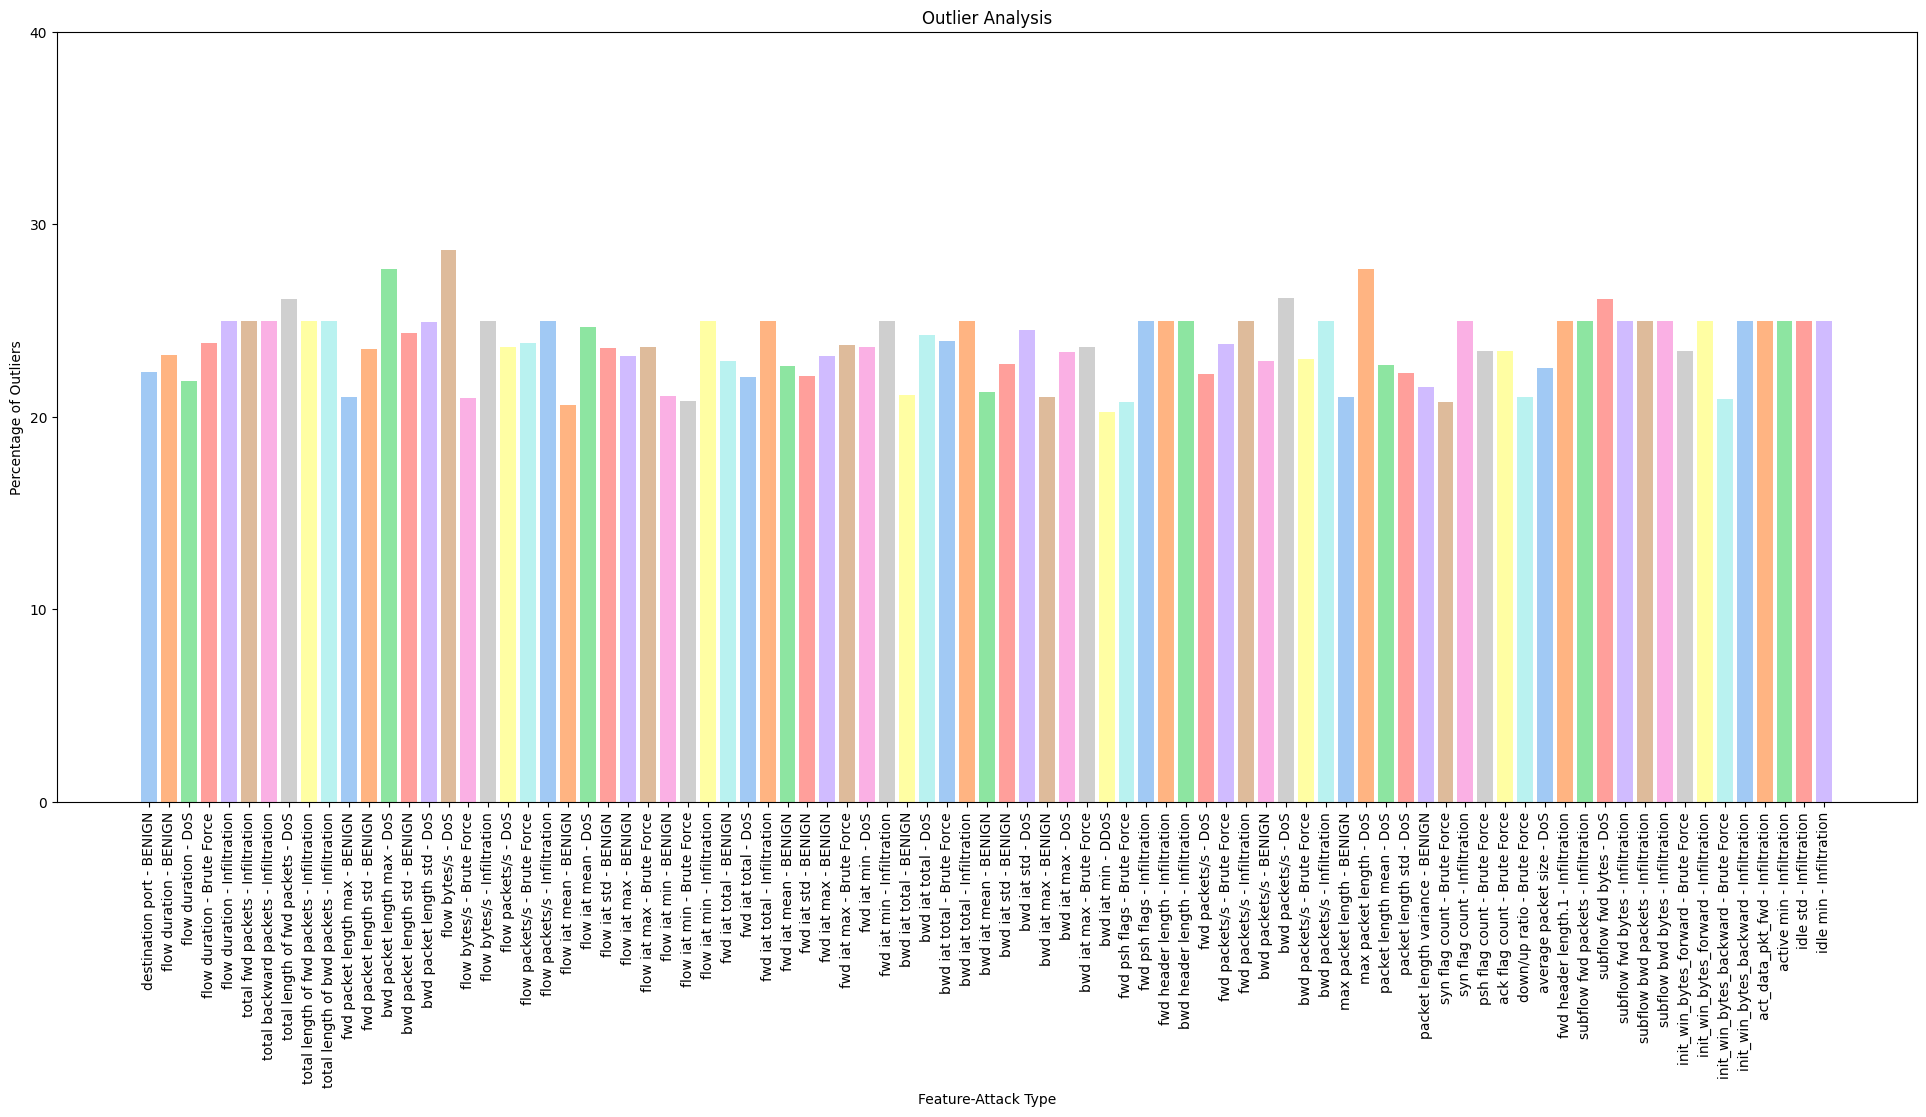

In [46]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['attack type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

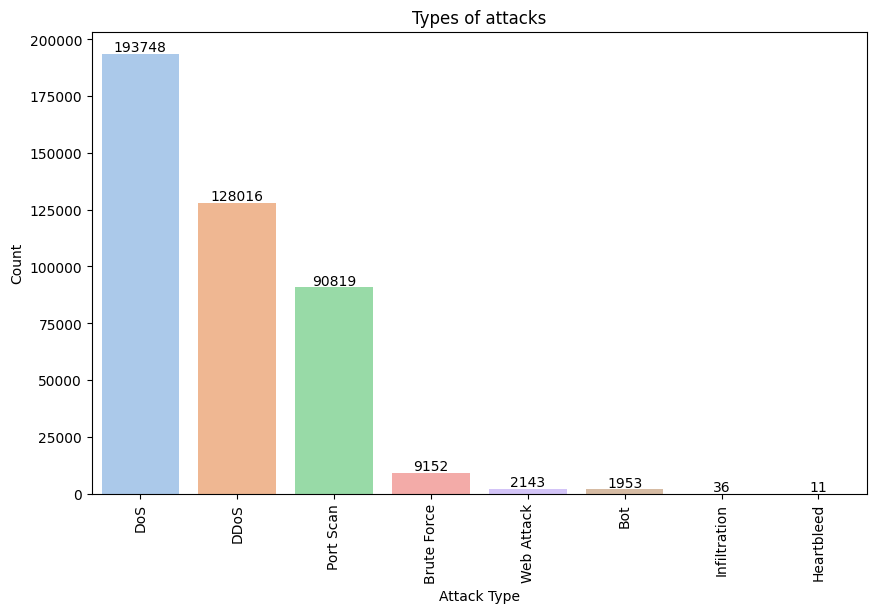

In [47]:

# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['attack type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'attack type', data = attacks, palette = 'pastel', order = attacks['attack type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

In [48]:
data.groupby('attack type').first()

,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,fwd packet length std,...,act_data_pkt_fwd,min_seg_size_forward,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min
attack type,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,...,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,...,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,...,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000,5024984,5024984
Infiltration,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,4,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Port Scan,80,5021059,6,5,703,1414,356,0,117.166667,181.536131,...,2,32,0.0,0.00000,0,0,0.0,0.00000,0,0
Web Attack,80,5185118,7,7,1022,2321,372,0,146.000000,184.078788,...,3,32,0.0,0.00000,0,0,0.0,0.00000,0,0


DATA PREPROCESSING

In [49]:

# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int32  
 1   flow duration                int32  
 2   total fwd packets            int32  
 3   total backward packets       int32  
 4   total length of fwd packets  int32  
 5   total length of bwd packets  int32  
 6   fwd packet length max        int32  
 7   fwd packet length min        int32  
 8   fwd packet length mean       float32
 9   fwd packet length std        float32
 10  bwd packet length max        int32  
 11  bwd packet length min        int32  
 12  bwd packet length mean       float32
 13  bwd packet length std        float32
 14  flow bytes/s                 float32
 15  flow packets/s               float32
 16  flow iat mean                float32
 17  flow iat std                 float32
 18  flow iat max                 int32  
 19  flow i

In [51]:

# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['bwd psh flags', 'bwd urg flags', 'fwd avg bytes/bulk',
       'fwd avg packets/bulk', 'fwd avg bulk rate', 'bwd avg bytes/bulk',
       'bwd avg packets/bulk', 'bwd avg bulk rate'],
      dtype='object')

In [52]:

data.shape

(2522362, 71)

In [53]:

data.columns

Index(['destination port', 'flow duration', 'total fwd packets',
       'total backward packets', 'total length of fwd packets',
       'total length of bwd packets', 'fwd packet length max',
       'fwd packet length min', 'fwd packet length mean',
       'fwd packet length std', 'bwd packet length max',
       'bwd packet length min', 'bwd packet length mean',
       'bwd packet length std', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min',
       'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max',
       'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std',
       'bwd iat max', 'bwd iat min', 'fwd psh flags', 'fwd urg flags',
       'fwd header length', 'bwd header length', 'fwd packets/s',
       'bwd packets/s', 'min packet length', 'max packet length',
       'packet length mean', 'packet length std', 'packet length variance',
       'fin flag count', 'syn flag count', 'rst flag count', 'psh flag count',

In [54]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('attack type', axis = 1)
attacks = data['attack type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [55]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.30%


In [56]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['attack type'] = attacks.values
print(len(transformed_features), len(attacks))

2522362 2522362


CREATING A BALANCED DATASET

In [57]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['attack type'] == 'BENIGN']
intrusions = new_data.loc[new_data['attack type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['attack type'] = np.where((ids_data['attack type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['attack type'].value_counts())

attack type
1    7540
0    7460
Name: count, dtype: int64


In [58]:
bc_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,attack type
1080722,9.358975,-0.305021,-1.573795,-2.337903,2.164631,-0.448710,-0.095588,-0.999269,0.531986,1.180831,...,0.002886,-0.206970,0.061554,0.263916,0.498915,-0.060638,0.000622,-0.618587,0.151135,1
1171734,6.377827,-0.747452,4.507055,-0.135987,2.131633,0.543314,-0.148042,-3.242425,-0.612370,1.597544,...,1.214270,0.811346,0.428905,0.354355,0.425527,-0.047228,-0.002988,1.103984,-0.203426,1
2385241,-1.989040,-0.039763,0.196994,-0.669131,-1.244578,-0.916119,-0.069794,-0.626994,0.842700,-0.256847,...,0.035178,-0.006665,-0.042091,0.041809,0.021472,-0.001749,0.000467,-0.009116,-0.010473,0
2208085,9.316547,0.566182,1.136256,13.518495,-0.055885,-5.669852,-0.127834,-3.038099,-2.264454,2.124777,...,-0.267683,0.012553,0.412491,-0.305303,-0.732627,-0.001900,-0.001185,-0.498448,0.480757,0
1690488,-2.000448,-0.039795,0.208647,-0.598662,-1.022022,-0.650070,-0.050272,-0.544500,0.528242,-0.183290,...,-0.047342,-0.132341,-0.132318,0.199306,-0.069502,-0.001290,0.001431,-0.008187,-0.003693,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168470,-1.179163,-0.122255,0.746225,-0.410926,0.765493,0.335162,-0.003835,-0.528464,-0.459108,0.473845,...,-0.360278,-0.609968,-0.672532,-0.348862,-0.111783,0.018134,0.000749,0.138248,0.006583,1
522406,-2.039994,-0.048036,0.339683,0.043141,1.429040,0.350132,0.008414,-0.349230,-0.656630,0.883253,...,-0.417587,1.039102,-0.869546,-0.079900,0.070815,-0.000893,0.000671,-0.085149,0.059176,0
1319394,-1.799447,0.016515,0.116724,0.927686,1.525556,-0.189067,0.000285,-0.285415,-0.596189,1.106614,...,-0.364534,1.769554,-0.887021,0.187626,-0.032992,0.012869,0.002166,-0.054188,0.022307,0
1523247,-1.992423,-0.036086,0.190105,-0.631637,-1.049000,-0.669553,-0.052450,-0.562348,0.564348,-0.201682,...,0.001591,-0.085645,-0.112716,0.039195,0.026544,-0.003188,0.000026,-0.003127,0.007995,0


In [59]:
bc_data.to_csv('preprocessed_dataset.csv', index=False)

In [60]:
new_data['attack type'].value_counts()

,count
attack type,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953
Infiltration,36
Heartbleed,11


In [78]:

class_counts = new_data['attack type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['attack type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['attack type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['attack type'].value_counts()

,count
attack type,
BENIGN,5000
DoS,5000
DDoS,5000
Port Scan,5000
Brute Force,5000
Web Attack,2143
Bot,1953


In [79]:
from imblearn.over_sampling import SMOTE

X = df.drop('attack type', axis=1)
y = df['attack type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['attack type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['attack type'].value_counts()

,count
attack type,
Bot,5000
Web Attack,5000
Port Scan,5000
Brute Force,5000
DDoS,5000
DoS,5000
BENIGN,5000


In [80]:
blnc_data.to_csv('preprocessed_multiple_class.csv', index=False)